In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def elongate(df):
    df_long = pd.wide_to_long(df, i = "PRICES", j = "hour", stubnames=["Hour"], sep = " ").reset_index()
    df_long.rename(columns={"Hour": "price", "PRICES": "date"}, inplace = True)
    df_long['datetime'] = pd.to_datetime(df_long['date']) + pd.to_timedelta(df_long['hour'], unit='h')
    df_long.sort_values(['datetime'], ascending=[True], inplace=True)
    df_long['price'] = df_long['price'].astype(float) / 1000 # Convert price per MWh to price per KWh
    return df_long.reset_index(drop=True)

train = elongate(pd.read_excel('data/train.xlsx'))
val = elongate(pd.read_excel('data/validate.xlsx'))

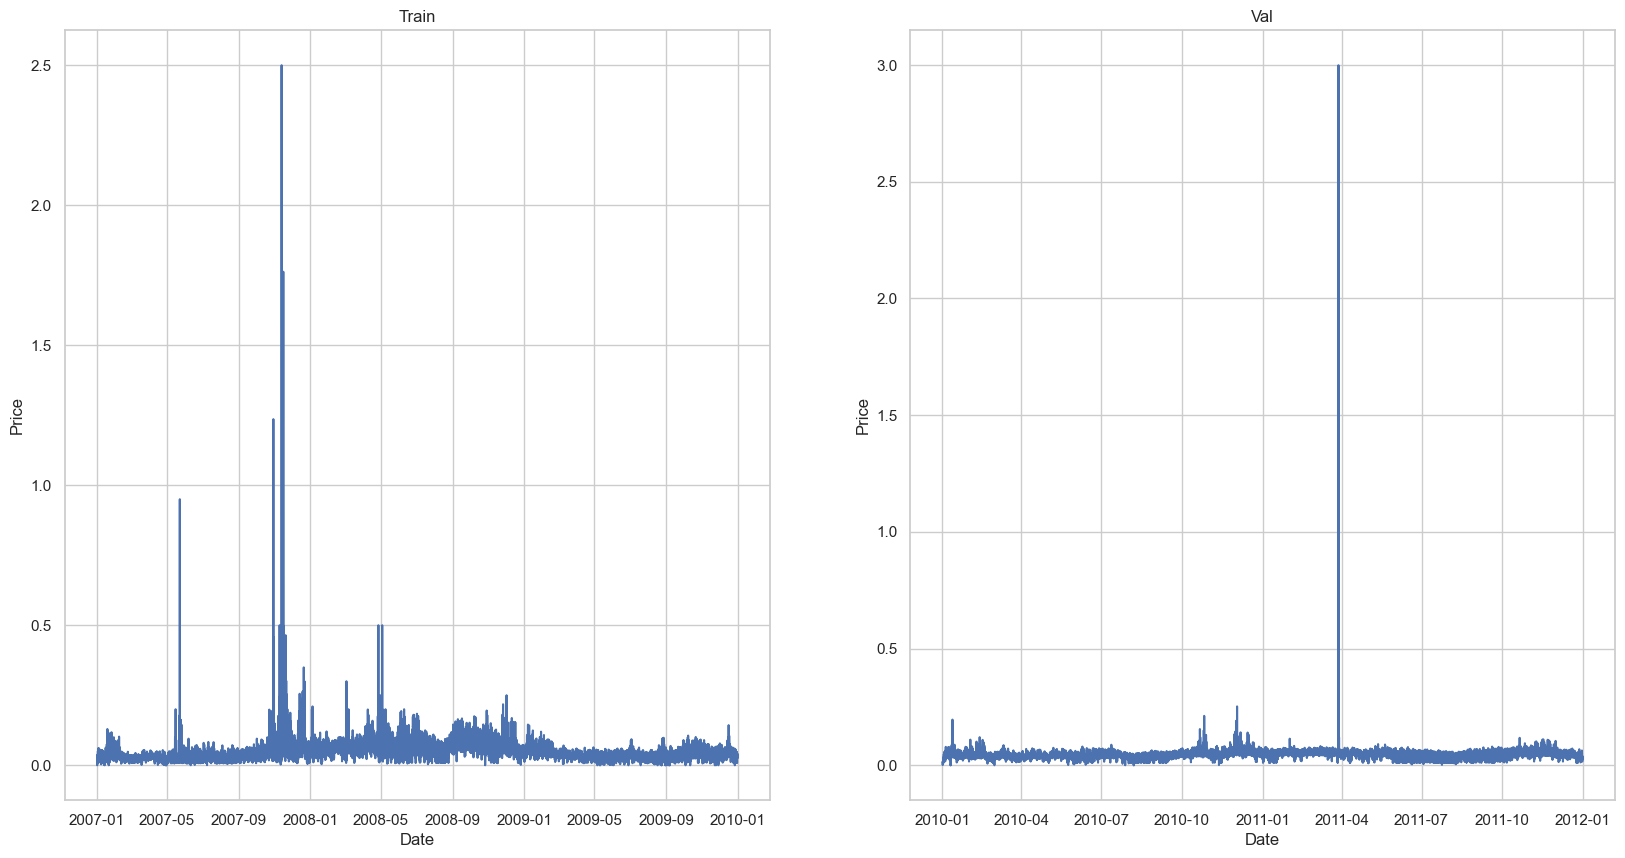

In [78]:
# PLOT PRICE x DATE 
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.plot(train['datetime'], train['price'])
plt.title('Train')
plt.xlabel('Date')
plt.ylabel('Price')

plt.subplot(1,2,2)
plt.plot(val['datetime'], val['price'])
plt.title('Val')
plt.xlabel('Date')
plt.ylabel('Price')

plt.show()

Text(0, 0.5, 'Price')

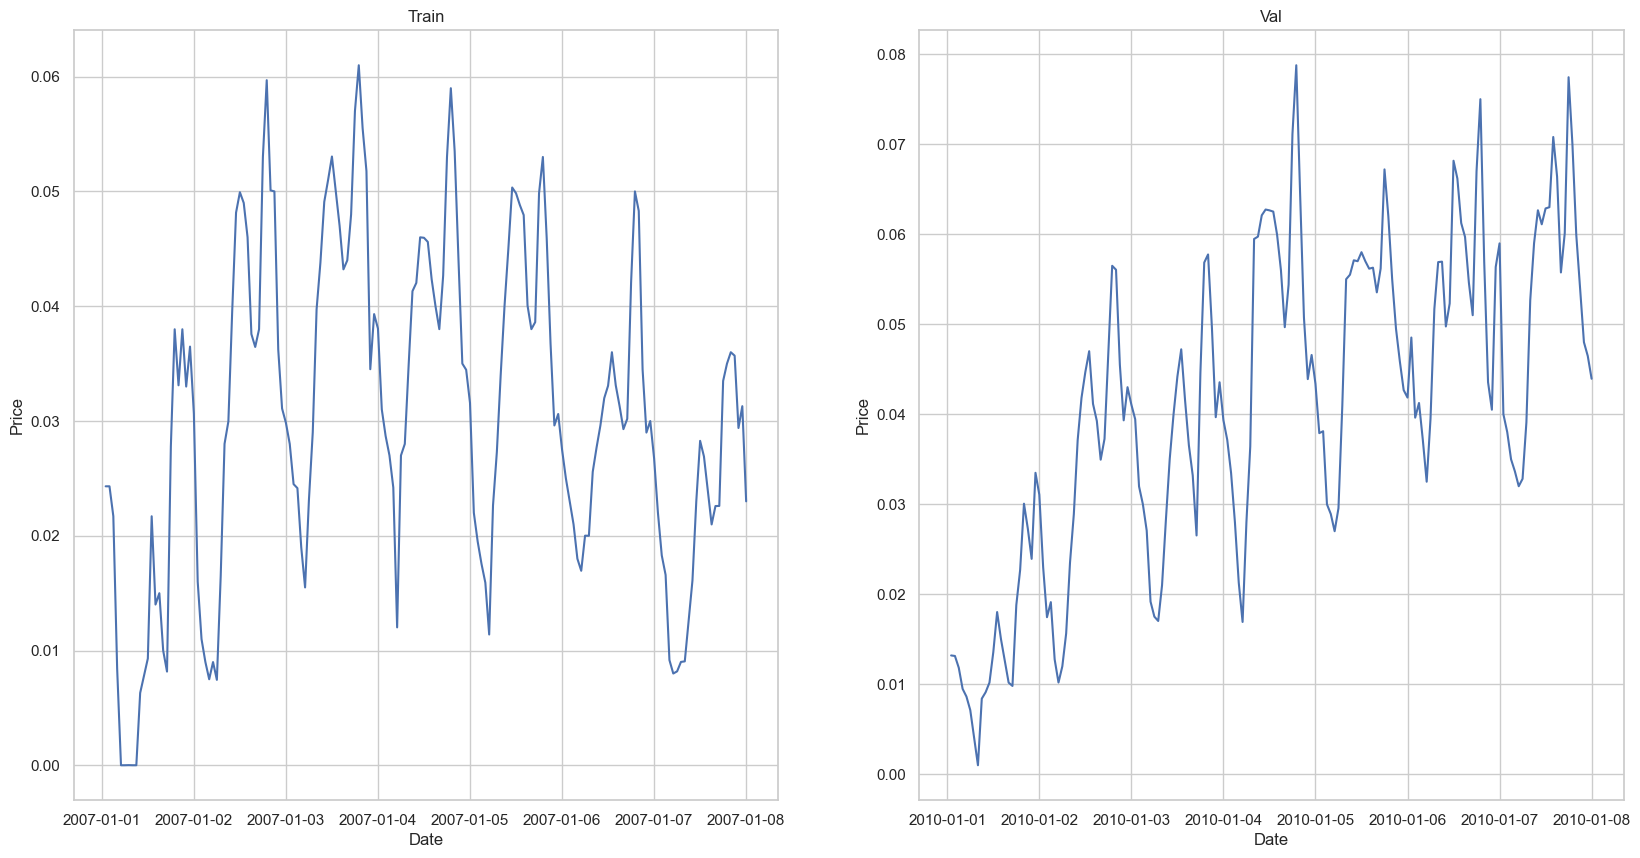

In [79]:
# PLOT PRICE x DATE - FIRST 4 WEEKS
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.plot(train['datetime'][:168], train['price'][:168])
plt.title('Train')
plt.xlabel('Date')
plt.ylabel('Price')

plt.subplot(1,2,2)
plt.plot(val['datetime'][:168], val['price'][:168])
plt.title('Val')
plt.xlabel('Date')
plt.ylabel('Price')

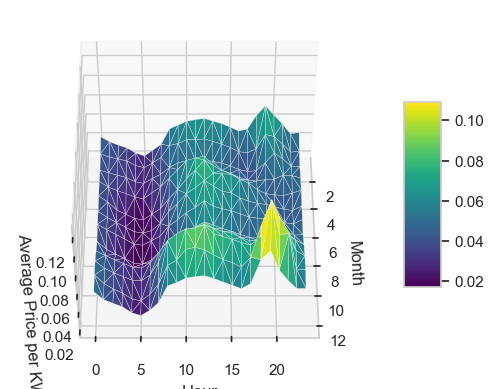

In [77]:
# 3D PLOT PRICE x MONTH x HOUR

# Import necessary libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Seaborn style
sns.set(style="whitegrid")

# Your data preparation steps
data = train.copy()
data['month'] = data['datetime'].dt.month
data['hour'] = data['datetime'].dt.hour
data = data.groupby(['month', 'hour']).mean().reset_index()

# Create the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Use plot_trisurf
surf = ax.plot_trisurf(data['month'], data['hour'], data['price'], cmap=plt.cm.viridis, linewidth=0.2)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

# Set labels
ax.set_xlabel('Month')
ax.set_ylabel('Hour')
ax.set_zlabel('Average Price per KWh')

# rotate it a little bit to the left
ax.view_init(50, 0)
# Show the plot
plt.show()

Text(0, 0.5, 'Price')

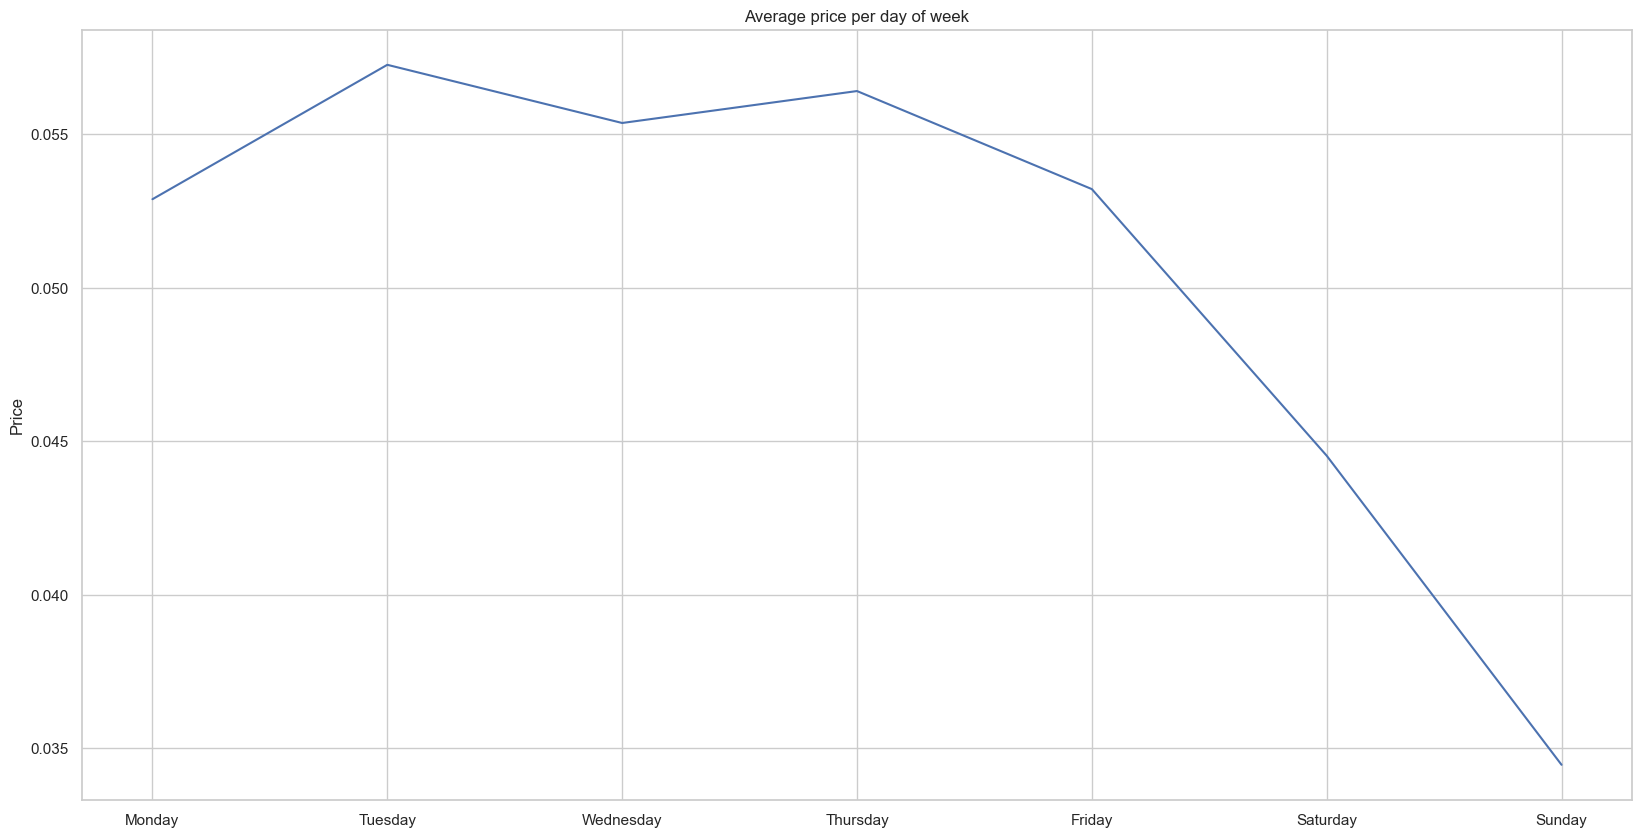

In [56]:
# PLOT DAY-OF-WEEK x AVERAGE PRICE
data = train.copy()
data['day'] = data['datetime'].dt.dayofweek
data = data.groupby(['day']).mean().reset_index()

plt.figure(figsize=(20,10))
plt.plot(data['day'], data['price'])
plt.title('Average price per day of week')
# x-as: monday, tuesday, etc.
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
# y-as: price
plt.ylabel('Price')


([<matplotlib.axis.XTick at 0x13ed89510>,
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'Oktober'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

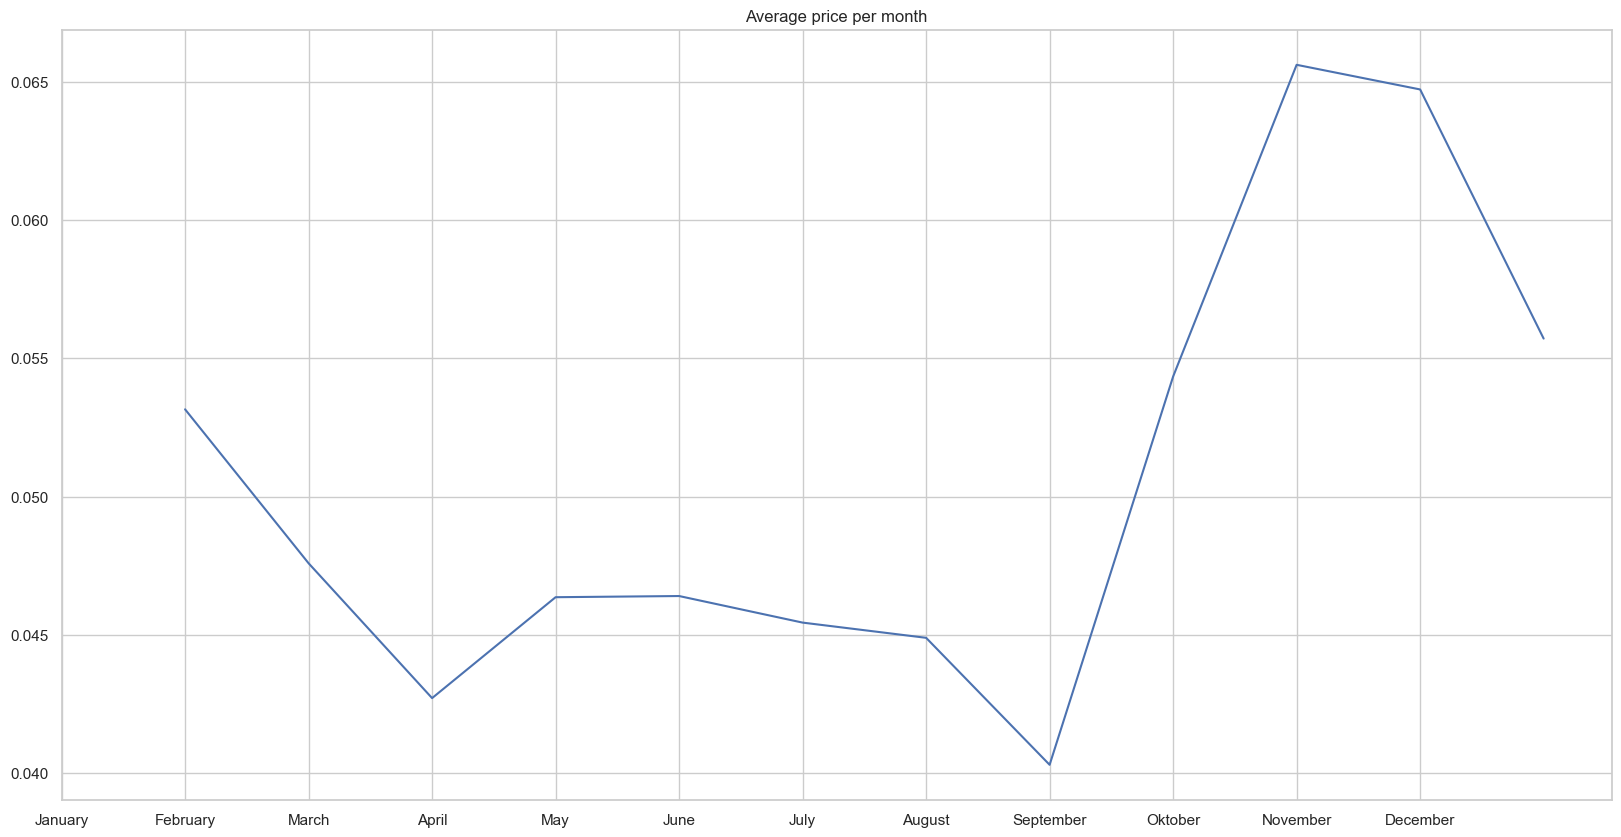

In [55]:
# PLOT MONTH x AVERAGE PRICE

data = train.copy()
data['month'] = data['datetime'].dt.month
data = data.groupby(['month']).mean().reset_index()

plt.figure(figsize=(20,10))
plt.plot(data['month'], data['price'])
plt.title('Average price per month')
# x-as: january, february, march, etc.
plt.xticks(range(12), ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'Oktober', 'November', 'December'])
# shift by 1 to start at january

([<matplotlib.axis.XTick at 0x13ea98d50>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

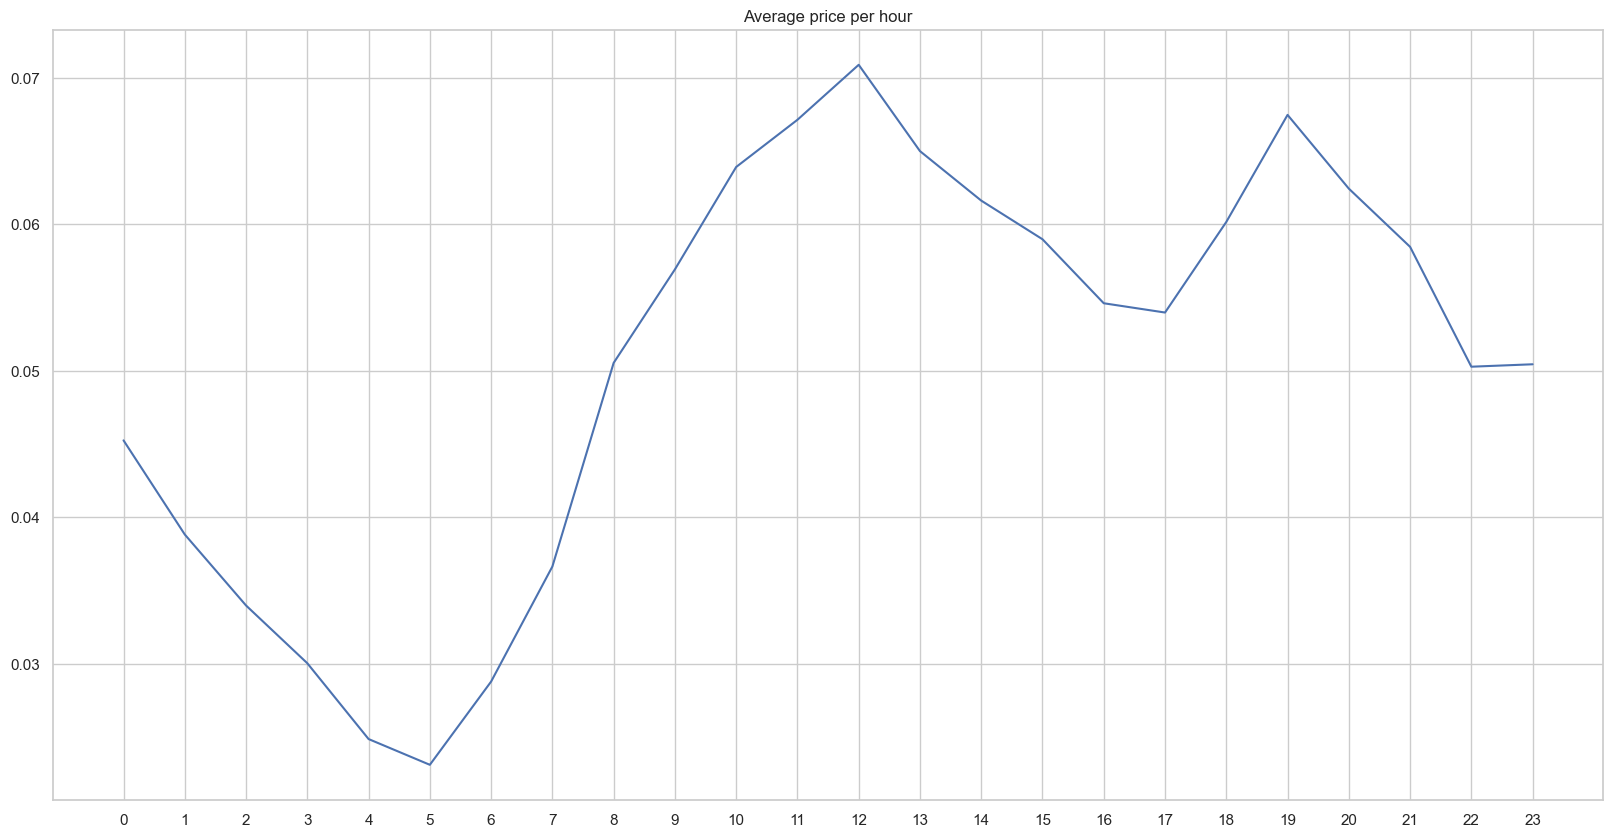

In [58]:
# PLOT HOUR x AVERAGE PRICE
data = train.copy()
data['hour'] = data['datetime'].dt.hour
data = data.groupby(['hour']).mean().reset_index()

plt.figure(figsize=(20,10))
plt.plot(data['hour'], data['price'])
plt.title('Average price per hour')
# x-as: hour
plt.xticks(range(24))

([<matplotlib.axis.XTick at 0x15f701d50>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

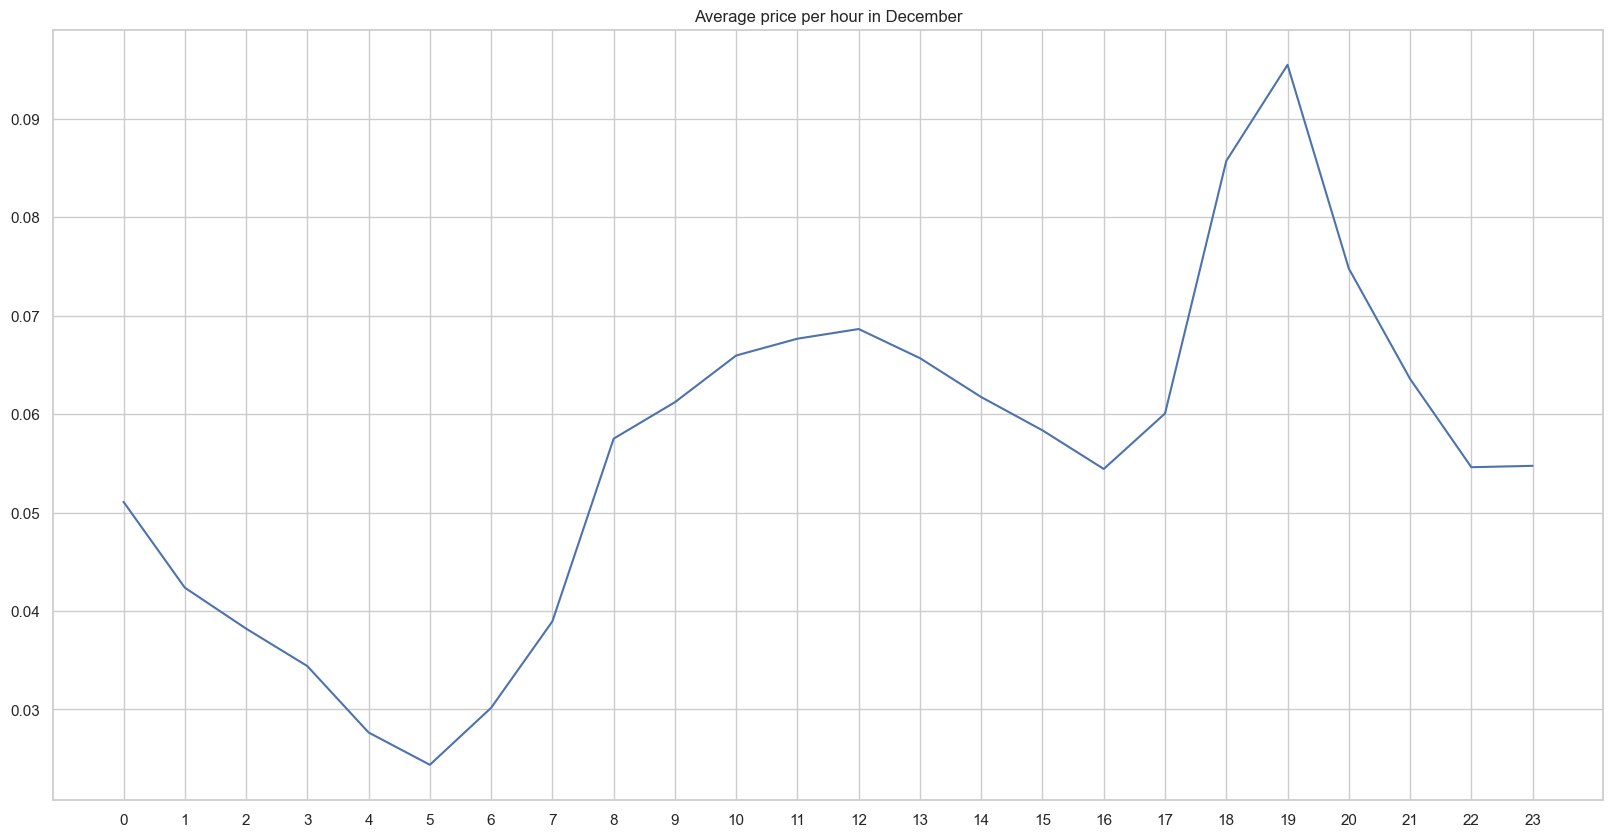

In [59]:
# PLOT HOUR x AVERAGE PRICE - DECEMBER

data = train.copy()
data['hour'] = data['datetime'].dt.hour
data['month'] = data['datetime'].dt.month
data = data[data['month'] == 12]
data = data.groupby(['hour']).mean().reset_index()

plt.figure(figsize=(20,10))
plt.plot(data['hour'], data['price'])
plt.title('Average price per hour in December')
# x-as: hour
plt.xticks(range(24))

([<matplotlib.axis.XTick at 0x177fb6090>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

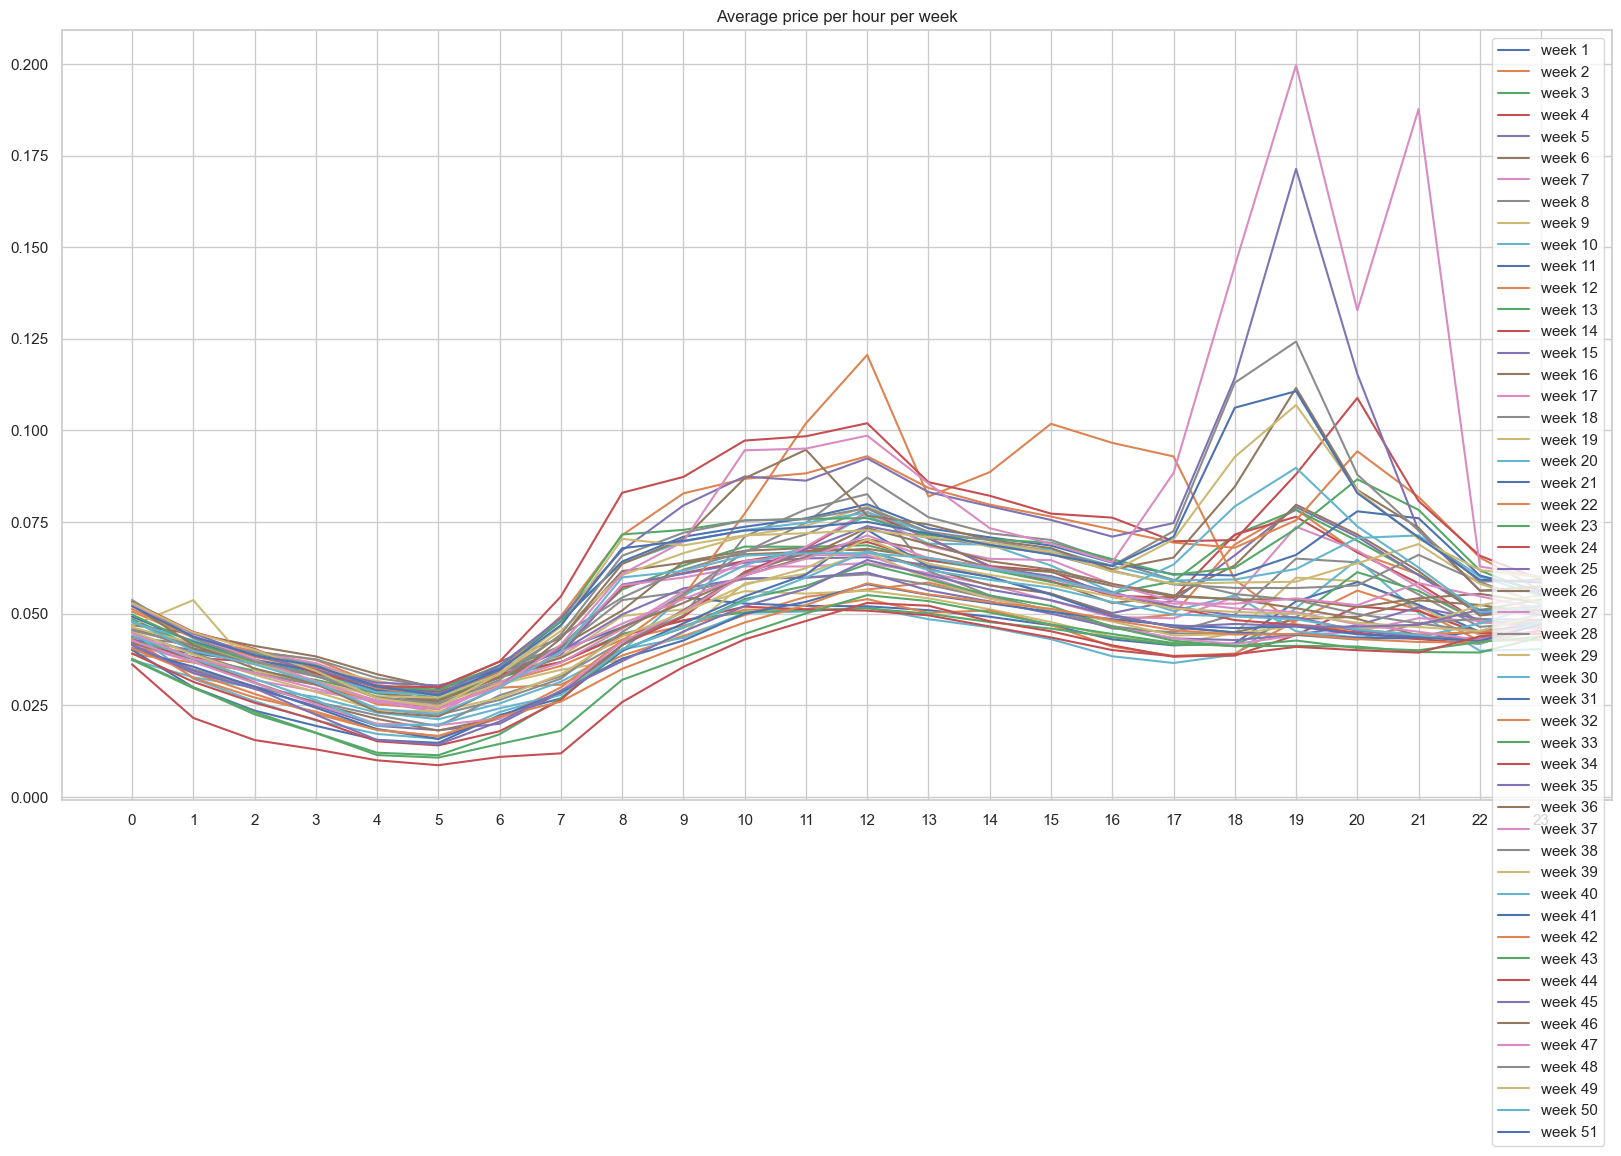

In [82]:
# PLOT PER 52 WEEKS - HOUR x AVERAGE PRICE
# price y as
# hour x as
# 8 lines with different colors for each week
data = train.copy()
data['hour'] = data['datetime'].dt.hour
data['week'] = data['datetime'].dt.isocalendar().week
# add 1 to all the weeks
data['week'] = data['week'] + 1
data = data[data['week'] <= 52]
data = data.groupby(['week', 'hour']).mean().reset_index()

plt.figure(figsize=(20,10))
for i in range(1,52):
    plt.plot(data[data['week'] == i]['hour'], data[data['week'] == i]['price'], label = 'week {}'.format(i))
plt.title('Average price per hour per week')    
plt.legend()
plt.xticks(range(24))




([<matplotlib.axis.XTick at 0x177ffe150>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

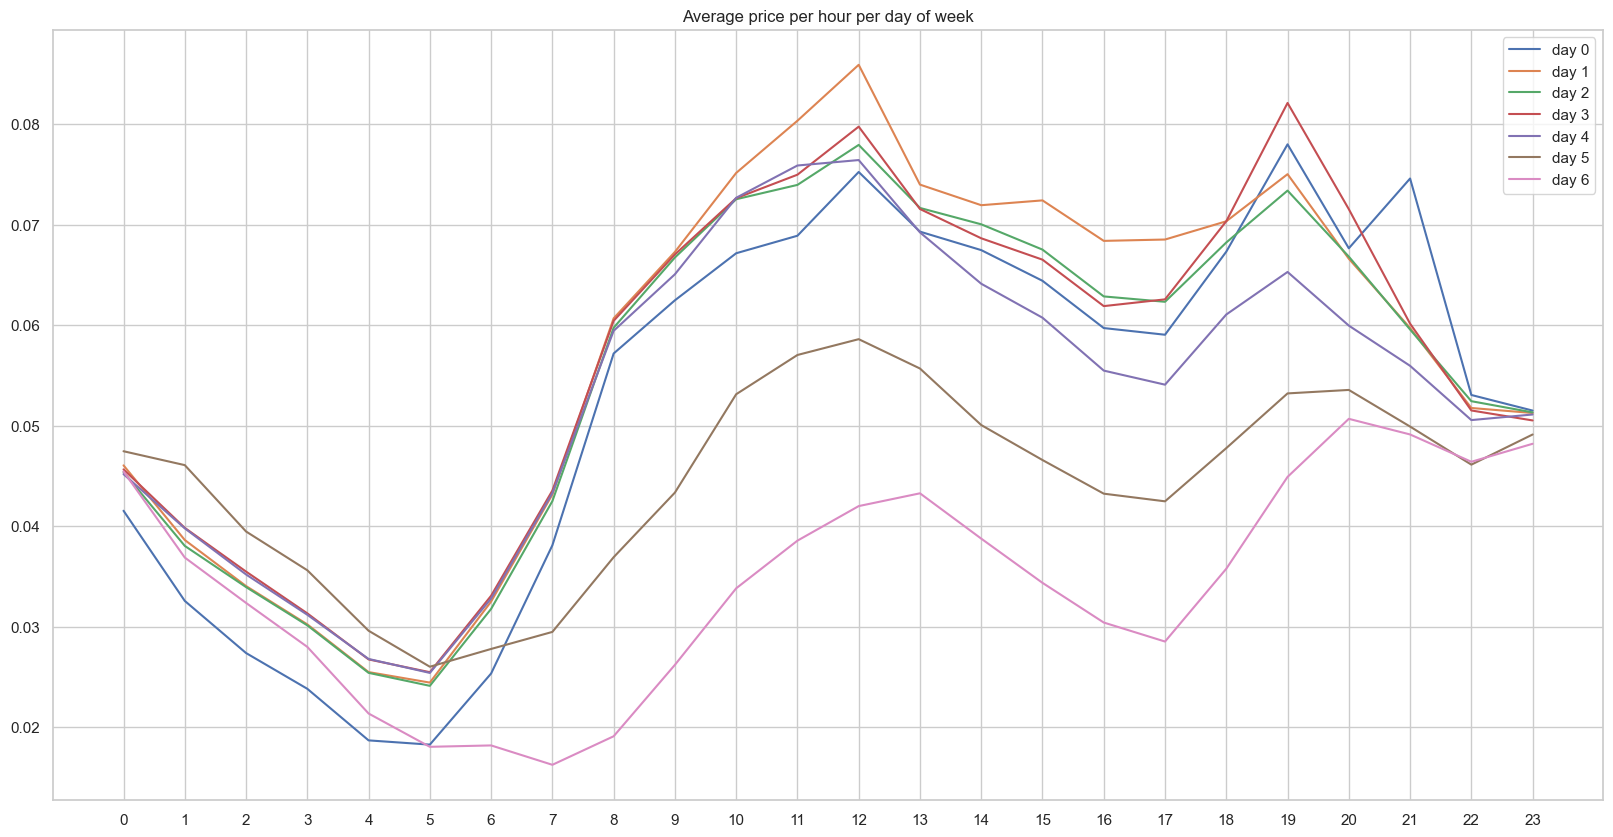

In [80]:
# PLOT PER WEEK DAY - HOUR x AVERAGE PRICE
# price y as
# hour x as
# 7 lines with different colors for each week day
data = train.copy()
data['hour'] = data['datetime'].dt.hour
data['day'] = data['datetime'].dt.dayofweek
data = data.groupby(['day', 'hour']).mean().reset_index()

plt.figure(figsize=(20,10))
for i in range(7):
    plt.plot(data[data['day'] == i]['hour'], data[data['day'] == i]['price'], label = 'day {}'.format(i))
plt.title('Average price per hour per day of week')
plt.legend()
plt.xticks(range(24))
